### Assess spatial patterns in instantaneous ET rates from ECOSTRESS across the S. Apps 

In [4]:
import pandas as pd
import numpy as np
import os
home = "/Volumes/GoogleDrive/My Drive/Chapter2_mechanisms_forest_water_cycling"

In [5]:
et_summary = pd.read_csv(os.path.join(home, "Data","Evapotranspiration", "summary_et.csv" ))
ndvi_summary = pd.read_csv(os.path.join(home, "Data", "NDVI", "ratio_ndvi_trend_results.csv" ))
trend_ratio_summary = ndvi_summary[(ndvi_summary["metric"] == "trend_ratio_ndvi") & (ndvi_summary["p_value"] <= 0.05)]
trend_sd_summary = ndvi_summary[(ndvi_summary["metric"] == "trend_sd_ndvi") & (ndvi_summary["p_value"] <= 0.05)]

trend_ratio_summary = trend_ratio_summary[["wsid", "mean_ndvi", "slope"]].merge(et_summary[["wsid", "avg_et", "sd_et", "ratio_et"]])
trend_sd_summary = trend_sd_summary[["wsid", "mean_ndvi", "slope"]].merge(et_summary[["wsid", "avg_et", "sd_et", "ratio_et"]])

In [19]:
# get the avreage ratio after 2019
ndvi_summary_long = pd.read_csv(os.path.join(home, "Data", "NDVI", "annual_ratio_ndvi.csv" ))
ndvi_summary_long = ndvi_summary_long[ndvi_summary_long['year'] >= 2019]
ndvi_summary_long = ndvi_summary_long.groupby('WSID').mean().reset_index()
ndvi_summary_long = ndvi_summary_long.merge(et_summary[['wsid', 'avg_et', 'sd_et', 'ratio_et']], left_on='WSID', right_on='wsid')

In [20]:
ndvi_summary_long

,WSID,year,RatioDownUp_NDVI,Mean_NDVI,wsid,avg_et,sd_et,ratio_et
0,15000100000037,2020.0,0.978203,0.456621,15000100000037,453.609631,6.612954,1.008965
1,15000100000210,2019.0,0.970835,0.461333,15000100000210,445.253849,10.298543,1.007851
2,15000100000224,2019.0,1.047929,0.414514,15000100000224,457.140637,8.749318,0.999754
3,15000100000312,2020.0,1.053273,0.402842,15000100000312,435.833110,4.853861,0.996891
4,15000100000379,2020.0,1.029270,0.444926,15000100000379,441.377925,11.335391,0.995278
...,...,...,...,...,...,...,...,...
29934,25000400269167,2019.0,0.985953,0.467517,25000400269167,311.697009,7.553821,1.005296
29935,25000400269220,2019.0,0.972867,0.477693,25000400269220,380.197980,14.202992,0.993282
29936,25000400269242,2019.0,0.966789,0.485831,25000400269242,408.305683,2.663412,1.006505
29937,25000400269268,2020.0,1.020005,0.478594,25000400269268,370.319773,5.890895,1.000959


In [28]:
final_dt = pd.read_csv(os.path.join(home, "Data",  "avg_catchment_vars.csv"))
final_dt = final_dt.drop(columns='Mean_NDVI')
final_dt = final_dt.merge(et_summary[["wsid", "avg_et", "sd_et", "ratio_et"]], left_on = "NHDPlusID", right_on="wsid")
final_dt = final_dt.merge(ndvi_summary_long[['WSID', 'RatioDownUp_NDVI']], left_on="NHDPlusID", right_on='WSID')
final_dt_cor = final_dt.drop(columns=['NHDPlusID', 'wsid', 'WSID'])
final_dt_cor.rename(columns={'Trend':'ratio_ndvi_trend'}, inplace=True)
final_dt_cor


,ratio_ndvi_trend,Pvalue_Trend,Overall_RatioDownUp_NDVI,tmin,tmax,prcp,vp,vpd,par,Aspect,Slope,Elevation,Latitude,HLI,pct_evergreen,AreaSqKm_x,avg_et,sd_et,ratio_et,RatioDownUp_NDVI
0,0.015688,0.347979,-0.032142,0.474985,0.757695,-0.713881,0.523868,0.845243,-0.584787,-0.181225,2.224986,-1.467129,2.598884,0.913340,-0.318083,-0.236419,453.609631,6.612954,1.008965,0.978203
1,-0.009509,-0.708207,0.012811,0.872164,1.050354,-0.772994,0.919658,1.138709,0.195973,-1.065879,-0.674705,-1.528351,2.583174,-0.576009,-0.318083,1.353299,445.253849,10.298543,1.007851,0.970835
2,0.002836,-0.310071,0.407232,-0.165012,0.075056,-2.037888,-0.142416,0.213553,0.478222,0.370530,0.262146,-0.845988,3.744772,-0.564000,1.318161,1.155776,457.140637,8.749318,0.999754,1.047929
3,-0.024911,-0.693207,0.414907,-0.272487,-0.071337,-1.766317,-0.235311,0.042175,0.477760,-0.534495,-1.886905,-0.193725,3.766126,-0.243408,0.554038,-0.185052,435.833110,4.853861,0.996891,1.053273
4,0.029515,1.808362,0.084421,1.015748,1.081832,-0.692609,1.082430,1.125555,0.037664,0.117291,-1.105749,-1.376781,2.510802,0.635918,-0.205595,1.264863,441.377925,11.335391,0.995278,1.029270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,0.008553,-0.629320,0.017440,-1.305168,-0.622887,-1.152137,-1.254527,-0.335139,1.130108,0.421033,-1.168812,0.174443,2.936994,0.323915,-0.318083,10.630533,311.697009,7.553821,1.005296,0.985953
29935,-0.007143,-0.705390,-0.004894,-1.399606,-0.706225,-1.204583,-1.345625,-0.407443,1.529998,-0.237598,-0.470433,0.076899,2.929902,0.192392,-0.318083,4.231418,380.197980,14.202992,0.993282,0.972867
29936,0.005274,-0.676782,-0.025242,-1.633314,-0.978894,-1.207879,-1.571596,-0.650549,1.172245,0.210679,0.027024,0.303000,2.794448,0.946045,-0.318083,1.399899,408.305683,2.663412,1.006505,0.966789
29937,-0.062426,-0.584737,0.262866,-1.541797,-0.799534,-1.403473,-1.491073,-0.457360,1.397656,-0.991113,0.596132,0.412807,2.858237,-0.414378,0.659687,0.698242,370.319773,5.890895,1.000959,1.020005


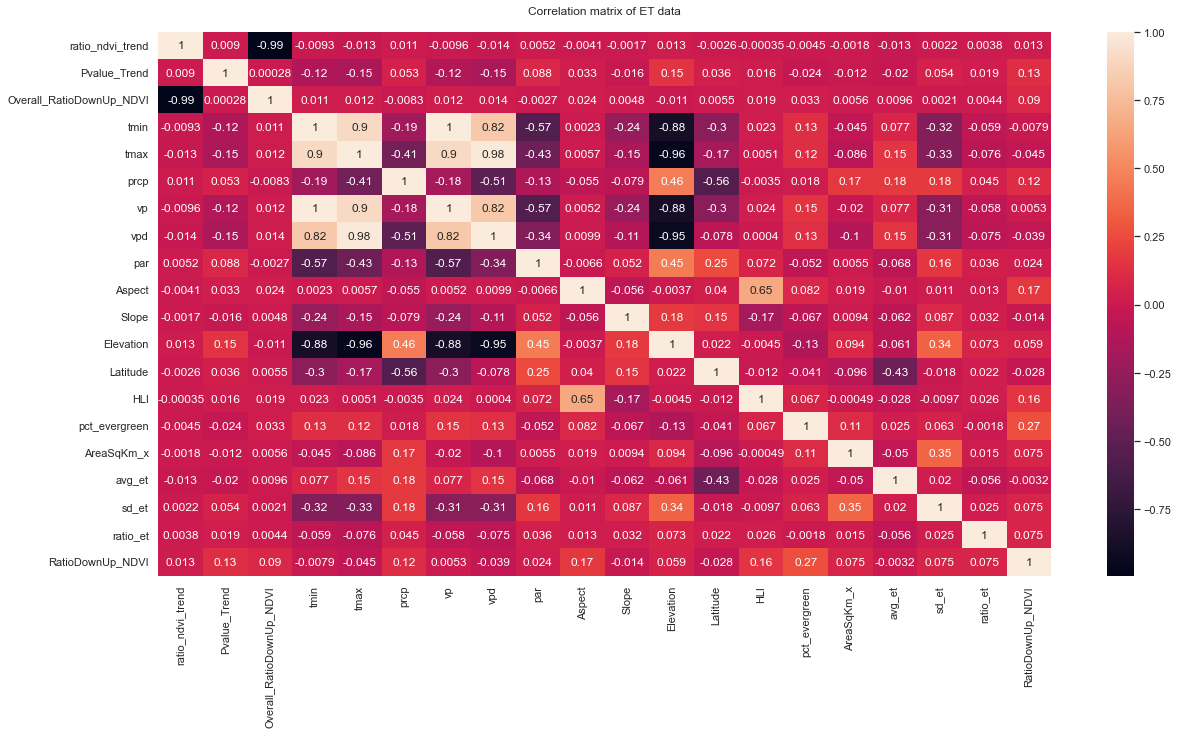

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


hm = sns.heatmap(final_dt_cor.corr(), annot = True)
hm.set(title = "Correlation matrix of ET data\n")
sns.set(rc={'figure.figsize':(20,10)})
plt.show()
